In [3]:
import sys
import importlib

import numpy as np
import pandas as pd
import xarray as xr
import pvlib as pv
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [5]:
sys.path.append('/home/travis/python_code/letkf_forecasting/')
import letkf_forecasting as lf

In [15]:
importlib.reload(lf)

<module 'letkf_forecasting' from '/home/travis/python_code/letkf_forecasting/letkf_forecasting.py'>

In [6]:
#for Golem
sat_14 = xr.open_dataset('/home/travis/python_code/forecasting/current_data/sat_14.nc')
sat_15 = xr.open_dataset('/home/travis/python_code/forecasting/current_data/sat_15.nc')
wind_15 = xr.open_dataset('/home/travis/python_code/forecasting/current_data/wind_15_crop.nc')
sensor_data = pd.read_hdf('/home/travis/python_code/forecasting/current_data/sensor_data.h5')
sensor_loc = pd.read_hdf('/home/travis/python_code/forecasting/current_data/sensor_loc.h5')

In [7]:
clear_sky_good = xr.DataArray(
    data=sat_15.GHI.values/sat_14.GHI.values,
    coords=sat_15.coords)

sat_15['clear_sky_good'] = clear_sky_good

In [8]:
sensor_CI = sensor_data[['clearsky_index', 'id']]
sensor_CI = sensor_CI.reset_index().pivot(
    index='time', columns='id', values='clearsky_index')
sensor_CI = sensor_CI.resample('5min').mean().dropna()

In [111]:
#This is taken from http://www.groundcontrol.com/Satellite_Look_Angle_Calculator.html
goes15_azimuth = 220.5*(2*np.pi)/360
goes15_elevation = 44.1*(2*np.pi)/360

time = pd.Timestamp('2014-04-15 11:00:00').tz_localize('MST')
tus = pv.location.Location(32.2, -111, 'US/Arizona', 700,'Tucson')
solar_position = tus.get_solarposition(time)
lf.parallax_shift(2000,
                     goes15_azimuth,
                     goes15_elevation,
                     solar_position['azimuth'].values*np.pi/360,
                     solar_position['elevation'].values*np.pi/360)

(array([ 4502.7974688]), array([ 2902.55179225]))

In [117]:
np.concatenate()

TypeError: Required argument 'seq' (pos 1) not found

In [156]:
importlib.reload(lf)
lf.assimilation_position_generator((10,10), 2)

(array([ 0,  2,  4,  6,  8,  9, 20, 22, 24, 26, 28, 29, 40, 42, 44, 46, 48,
        49, 60, 62, 64, 66, 68, 69, 80, 82, 84, 86, 88, 89, 90, 92, 94, 96,
        98, 99]), array([[0, 0],
        [0, 2],
        [0, 4],
        [0, 6],
        [0, 8],
        [0, 9],
        [2, 0],
        [2, 2],
        [2, 4],
        [2, 6],
        [2, 8],
        [2, 9],
        [4, 0],
        [4, 2],
        [4, 4],
        [4, 6],
        [4, 8],
        [4, 9],
        [6, 0],
        [6, 2],
        [6, 4],
        [6, 6],
        [6, 8],
        [6, 9],
        [8, 0],
        [8, 2],
        [8, 4],
        [8, 6],
        [8, 8],
        [8, 9],
        [9, 0],
        [9, 2],
        [9, 4],
        [9, 6],
        [9, 8],
        [9, 9]]), array([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4],
        [0, 5],
        [0, 6],
        [0, 7],
        [0, 8],
        [0, 9],
        [1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5]

Loc is False
0.128841033073
0.138161497418


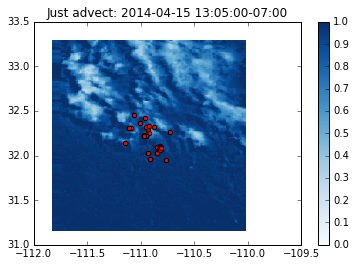

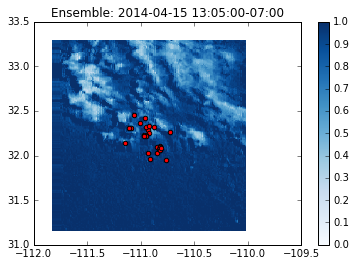

Loc is False
0.231128986527
0.20080205116


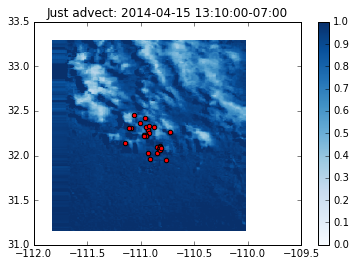

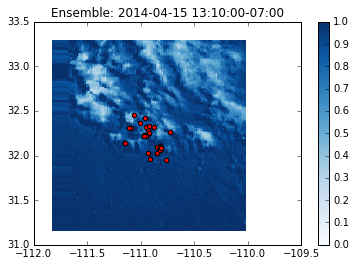

Starting Full image


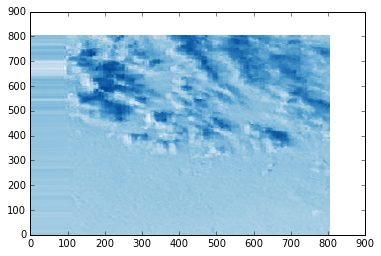

W_interp: (100, 100)
[[  1.00069077e+00   7.02808972e-04   7.07254851e-04 ...,   2.06344540e-03
    1.99812284e-03   1.00194779e+00]
 [  1.00639514e+00   7.26842227e-03   6.11160229e-03 ...,  -1.84851053e-02
   -1.84266176e-02   9.80894836e-01]
 [  1.00637198e+00   7.26679518e-03   6.04528220e-03 ...,  -1.18584676e-02
   -1.17093161e-02   9.87575965e-01]
 ..., 
 [  1.28747646e+00   3.06988226e-01   2.80252290e-01 ...,   5.97991203e-01
    6.00694163e-01   1.58212679e+00]
 [  1.00806013e+00   1.19119331e-02   6.65315934e-03 ...,  -4.50415403e-02
   -4.44607554e-02   9.52054890e-01]
 [  1.02690960e+00   3.04646223e-02   2.56000090e-02 ...,  -5.60351300e-02
   -5.54908687e-02   9.41200317e-01]]
W_fine_mesh: (646416, 10, 10)
[[[  1.00069077e+00   7.02808972e-04   7.07254851e-04 ...,   7.22329067e-04
     6.90219189e-04   6.71440248e-04]
  [  5.67166183e-04   1.00056471e+00   5.80785070e-04 ...,   5.85024476e-04
     5.67773724e-04   5.48516586e-04]
  [ -1.85533358e-04  -1.76360350e-04   9.

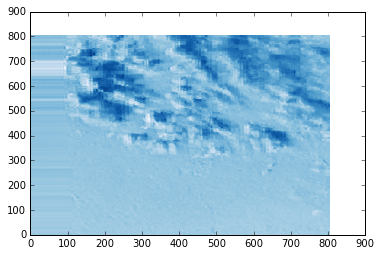

Loc is False
0.179287998094
0.221713647032


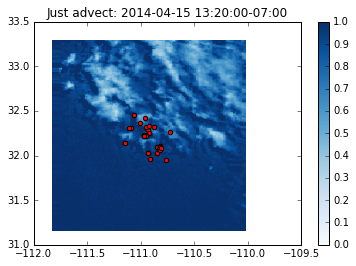

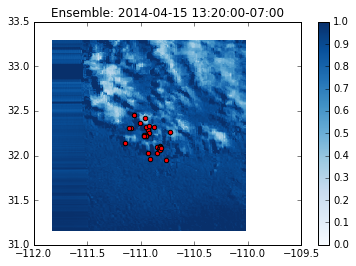

Loc is False
0.161958963276
0.156525790169


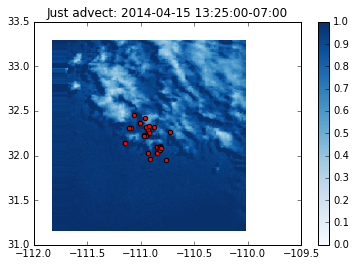

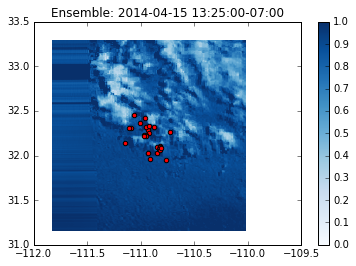

In [157]:
importlib.reload(lf)
dx = 250 #in km
dy = 250 #in km
C_max = 1.2
assimilation_grid_size = 100
localization = 30

sat_sig = .1
sensor_sig = .1
ens_size = 10
wind_sigma = (.4, .05)
wind_size = 2

start_time = '2014-04-15 13:00:00' #11:00:00 is not a bad start
end_time = '2014-04-15 13:30:00' #Gets boring shortly after 14:00:00

lf.simulation(sat_15, wind_15, sensor_CI, sensor_loc,
              start_time, end_time, dx, dy, C_max,
              assimilation_grid_size, localization,
              sat_sig, sensor_sig, ens_size, wind_sigma, wind_size)